<a href="https://colab.research.google.com/github/nupurrana451/Machine-Learning-Projects/blob/main/LoanStatusPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:


1.   Importing Data
2.   EDA
3. Data Preprocessing
4. Train Test Split
5. Model evaluation-LogisticRegresssion
6. Prediction System

# **Importing libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Importing dataset

In [5]:
loan_df=pd.read_csv('/content/loan_dataset.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [6]:
loan_df.shape

(614, 13)

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
loan_df.dropna(inplace=True)
loan_df.head()
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [10]:
label_encoder = LabelEncoder()
loan_df['Gender'] = label_encoder.fit_transform(loan_df['Gender'])
loan_df['Married'] = label_encoder.fit_transform(loan_df['Married'])
loan_df['Education'] = label_encoder.fit_transform(loan_df['Education'])
loan_df['Self_Employed'] = label_encoder.fit_transform(loan_df['Self_Employed'])
loan_df['Dependents'] = label_encoder.fit_transform(loan_df['Dependents'])
loan_df['Property_Area'] = label_encoder.fit_transform(loan_df['Property_Area'])
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


<Axes: >

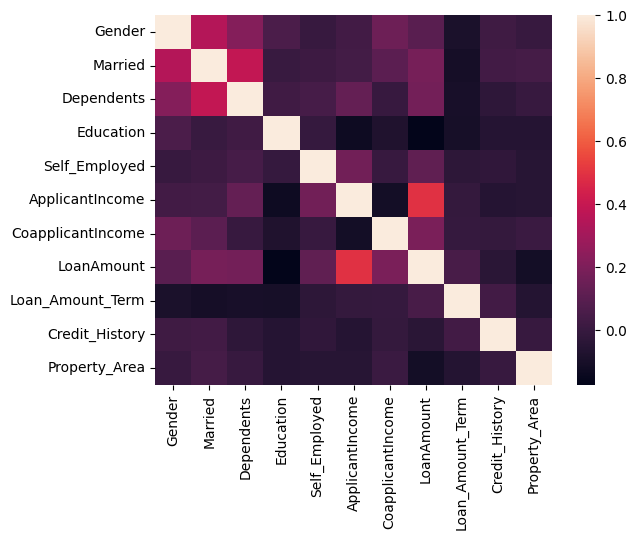

In [11]:
sns.heatmap(loan_df.corr(numeric_only=True))

People with a credit history are more likely to get an approval for a loan

In [12]:
loan_df['Credit_History'].value_counts()

,count
Credit_History,
1.0,410
0.0,70


<Axes: xlabel='Self_Employed', ylabel='count'>

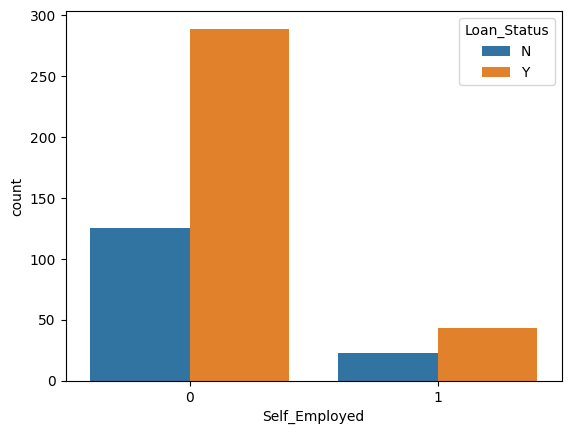

In [13]:
sns.countplot(data=loan_df,hue='Loan_Status',x='Self_Employed')

Filter for negative correlations

<Axes: xlabel='Credit_History', ylabel='count'>

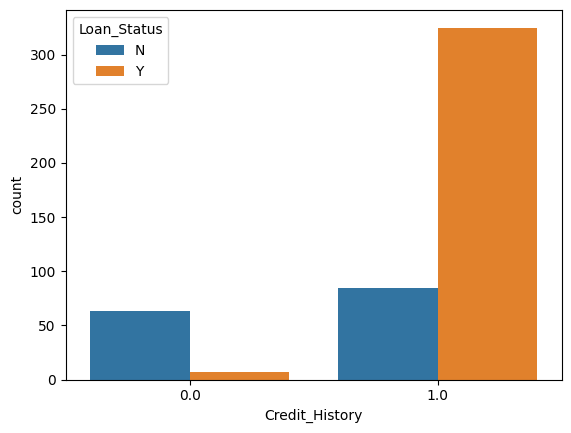

In [14]:
sns.countplot(data=loan_df,hue='Loan_Status',x='Credit_History')

In [15]:
loan_df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,411
180.0,36
480.0,12
300.0,9
120.0,3
84.0,3
60.0,2
240.0,2
36.0,2


<Axes: xlabel='Education', ylabel='count'>

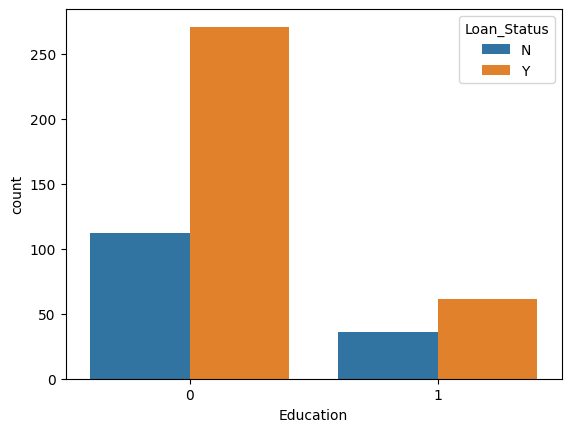

In [16]:
sns.countplot(data=loan_df,hue='Loan_Status',x='Education')

# Train Test Split

In [17]:
X=loan_df.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y=loan_df['Loan_Status']

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [19]:
classifier=svm.SVC(kernel='linear')

In [20]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation

In [21]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7942708333333334


In [22]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on training data:',test_data_accuracy)

Accuracy on training data: 0.8125


# Prediction System

In [24]:

input_data=(1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0]=='N'):
  print('The loan is rejected')
else:
  print('The loan is approved')

['Y']
The loan is approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
